In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


/Users/nil/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/nil/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/nil/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from torch.utils.data import Subset

train_data = torchvision.datasets.MNIST(
    root='data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_data = torchvision.datasets.MNIST(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [3]:
train_size = 60000
test_size = 10000
train_dataset = Subset(train_data, indices=range(len(train_data) // 10))
test_dataset = Subset(train_data, indices=range(len(test_data) // 10))

In [4]:

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=100, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

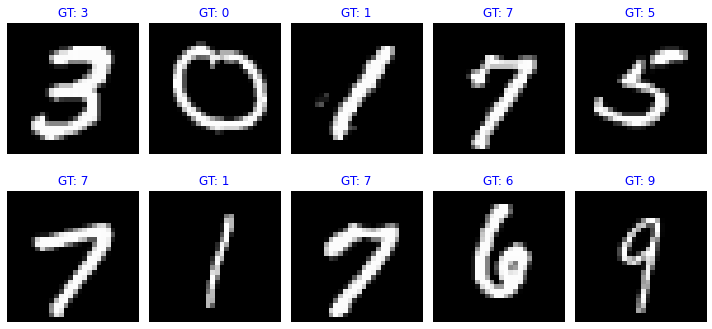

In [5]:
examples = iter(test_loader)
example_data, example_targets = next(examples)


params = {"text.color" : "blue",
          "xtick.color" : "black",
          "ytick.color" : "black"}
plt.rcParams.update(params)


import numpy as np
indices = np.random.randint(0, len(test_loader), size=10)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
examples = iter(test_loader)

for i, index in enumerate(indices):
    

    example_data, example_targets = next(examples)
    image, label = example_data[index][0], example_targets[index].item()

    # Plot the image with its ground truth
    axs[i].imshow(image.reshape(28, 28), cmap='gray')
    axs[i].set_title(f'GT: {label}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
input_size = 784 
hidden_size = 500 
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

In [7]:
# Fully connected neural network with one hidden layer



class NeuralNet(nn.Module):
    
    # initializes the neural network and sets its parameters. 
    # It takes three arguments - input_size, hidden_size, and num_classes 
    # input_size - the size of the input layer, 
    # hidden_size - the number of neurons in the hidden layer, 
    # num_classes - the number of output classes
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size

       
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
 

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x
    
model = NeuralNet(input_size, hidden_size, num_classes)

In [8]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
n_total_batches = len(train_loader)
print('Total Batches in train set:', n_total_batches)
losses = []

 
for epoch in range(num_epochs):
     
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_func(outputs, labels)
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

Total Batches in train set: 60
Epoch [1/3], Batch [10/60], Loss: 1.5156
Epoch [1/3], Batch [20/60], Loss: 0.7899
Epoch [1/3], Batch [30/60], Loss: 0.5415
Epoch [1/3], Batch [40/60], Loss: 0.3661
Epoch [1/3], Batch [50/60], Loss: 0.3244
Epoch [1/3], Batch [60/60], Loss: 0.4728
Epoch [2/3], Batch [10/60], Loss: 0.3642
Epoch [2/3], Batch [20/60], Loss: 0.2914
Epoch [2/3], Batch [30/60], Loss: 0.1593
Epoch [2/3], Batch [40/60], Loss: 0.1935
Epoch [2/3], Batch [50/60], Loss: 0.3553
Epoch [2/3], Batch [60/60], Loss: 0.3724
Epoch [3/3], Batch [10/60], Loss: 0.1871
Epoch [3/3], Batch [20/60], Loss: 0.2955
Epoch [3/3], Batch [30/60], Loss: 0.2904
Epoch [3/3], Batch [40/60], Loss: 0.1909
Epoch [3/3], Batch [50/60], Loss: 0.2439
Epoch [3/3], Batch [60/60], Loss: 0.1325


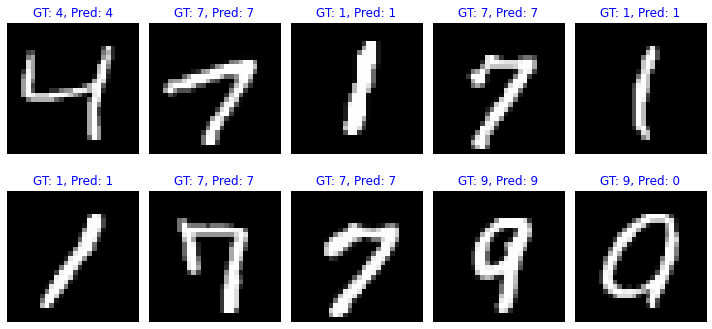

In [10]:
import numpy as np
indices = np.random.randint(0, len(test_loader), size=10)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
examples = iter(test_loader)

for i, index in enumerate(indices):
    # Get the image and ground truth label

    example_data, example_targets = next(examples)
    image, label = example_data[index][0], example_targets[index].item()

    # Make a prediction with the model
    with torch.no_grad():
        image = image.reshape(-1, 28*28)

        prediction = model(image)
        predicted_label = torch.argmax(prediction, dim=1).item()

    # Plot the image with its ground truth and predicted labels
    axs[i].imshow(image.reshape(28, 28), cmap='gray')
    axs[i].set_title(f'GT: {label}, Pred: {predicted_label}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 1000 test images: {acc} %')

Accuracy of the network on the 1000 test images: 93.5 %
